# No.1 Lost circulation field data analysis

In [43]:
# drilling data analysis

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import csv
import os
%matplotlib inline


# set the current work directiory
os.chdir('C:/Users/rur4893/Desktop/Real Time Lost Circulation')
# load drilling lost circulation data

time = []
lost_volume = []
Drilling_data = np.zeros(shape=(120,2))

with open('DS_lost_data.txt', 'r') as f:
    data = csv.reader(f, delimiter = '\t')
    for row in data:
        time.append(float(row[0]))
        lost_volume.append(float(row[1]))



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


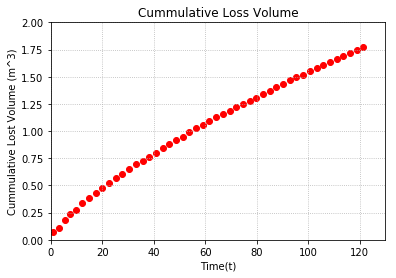

In [45]:
n_time = len(time)
for i in range(n_time):
    plt.scatter(time[i],lost_volume[i], c = 'r')
plt.xlim([0,130])
plt.ylim([0, 2])
plt.xlabel('Time(t)')
plt.ylabel('Cummulative Lost Volume (m^3)')
plt.title('Cummulative Loss Volume')
ax1 = plt.axes()
ax1.xaxis.grid(True, which = "major", linestyle = "dotted")
ax1.yaxis.grid(True, which = "major", linestyle = "dotted")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


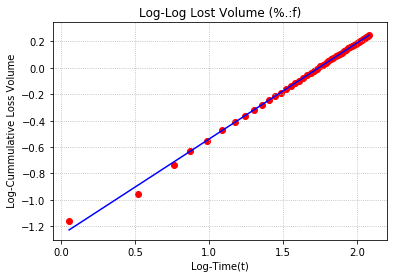

In [46]:
import math
for i in range(n_time):
    plt.scatter(math.log10(time[i]), math.log10(lost_volume[i]), c = 'r')
# be careful of log(x) = ln(x) and log10(x)---base 
plt.xlabel('Log-Time(t)')
plt.ylabel(' Log-Cummulative Loss Volume')
plt.title('Log-Log Lost Volume (%.:f)')
ax1 = plt.axes()
ax1.xaxis.grid(True, which = "major", linestyle = "dotted")
ax1.yaxis.grid(True, which = "major", linestyle = "dotted")
from sklearn.linear_model import LinearRegression
# calculate log10(time)
log_time = [math.log10(i) for i in time]
x_time = np.ones(shape=(n_time,2))
x_time[:,0]= log_time

# calculate log10(volume)
y_volume = [math.log10(i) for i in lost_volume]

# wrong we should use the log data and linear regression
reg = LinearRegression().fit(x_time,y_volume)
plt.plot(x_time[:,0], reg.predict(x_time), 'b')
plt.show()
# here the coefficinet is really small, pls double check
# the calculation according to the inv(X.T@X)X.T = y 
# coefficient = 0.72

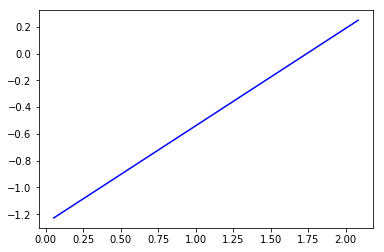

In [47]:
from sklearn.linear_model import LinearRegression
# calculate log10(time)
log_time = [math.log10(i) for i in time]
x_time = np.ones(shape=(n_time,2))
x_time[:,0]= log_time

# calculate log10(volume)
y_volume = [math.log10(i) for i in lost_volume]

# wrong we should use the log data and linear regression
reg = LinearRegression().fit(x_time,y_volume)
plt.plot(x_time[:,0], reg.predict(x_time), 'b')
plt.show()
# here the coefficinet is really small, pls double check
# the calculation according to the inv(X.T@X)X.T = y 
# coefficient = 0.72

# No.2 Theoretical lost circulation type-curve data analysis

## (1) Theoretical type curve calculation

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


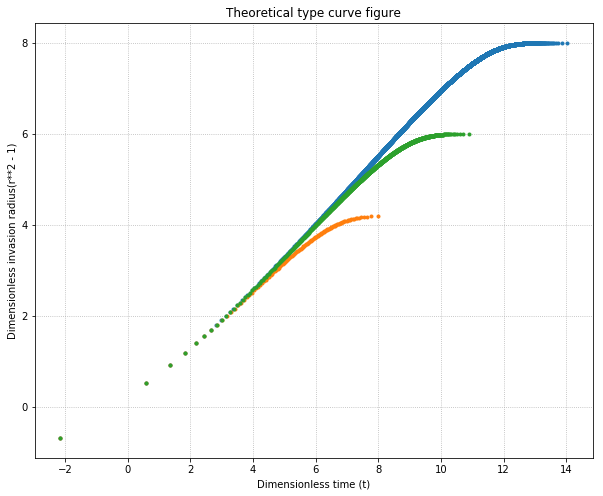

In [147]:
# theoretical type curve data analysis
# do not use vectorization integration
# calculation use adaptive quad integration
from scipy.integrate import simps
from scipy.integrate import quad

# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
delta_p = 4.2 * 10**6    # over-pressure
# dimensionless lost circulation parameters

Dimensionless_a = [0.0001,0.008,0.001]

# define the dimensionless function for this calculation

f = lambda x: 2.**((m+1)/m)*x*(((x**(1-m))-1)/(1-m))**(1/m)/(1-a*(x-1))**(1/m)

# calculation time step
# dynamic list append
Rad_d = []
Time_d = []

for k,v in enumerate(Dimensionless_a):
    
    Radius_d_init = 1.1                            # the initial R_d
    Radius_d_alti = 1 + 1./v                       # the altimate R_d

    Radius_d = np.arange(Radius_d_init, Radius_d_alti)
    total_time_step = len(Radius_d)
    # calculation the time step matrices
    Rad_d.append(Radius_d);

# seven matrices
# use quad integration

for k,a in enumerate(Dimensionless_a):
    Y = [quad(f,1.01,int_val)[0] for int_val in Rad_d[k]]
    Time_d.append(Y)
    
plt.figure(figsize=(10,8))
for i in range(len(Dimensionless_a)):
    plt.plot(np.log10(Time_d[i]),np.log10(Rad_d[i]**2 - 1), '.')
    
plt.title('Theoretical type curve figure')
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius(r**2 - 1)')
# plt.legend()

ax3 = plt.axes()
ax3.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax3.yaxis.grid(True, which = 'Major', linestyle='dotted') 

# Good time_step algorithm.
# Radius_d  the fluid invasion radius.

## (2) Data analysis for theoretical type curve

## (1) Linear regression--sklearn

0.961874983155
[ 0.58071619  0.        ]


Text(0,0.5,'radius')

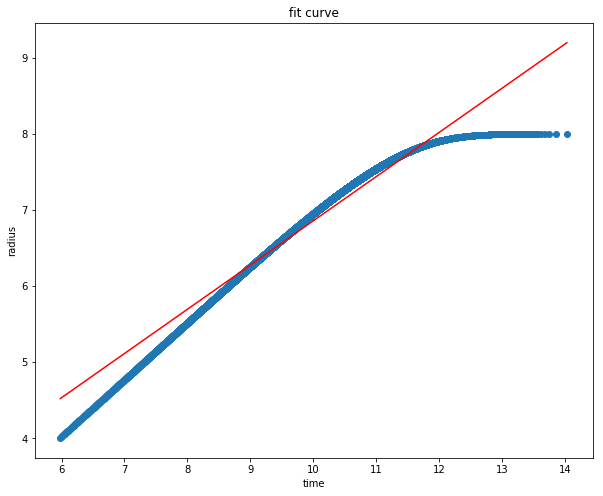

In [189]:
# use the linear regression to analysis the linearization
# use the Hough transformation to projection
# pls cut off the initial point because of the dysfunction of numerical integration
# we cut of the initial point of the calculation
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(np.log10(Time_d[0][100:]),np.log10(Rad_d[0][100:]**2 - 1))
reg = LinearRegression()
length = len(Time_d[0])-100
x_val = np.ones(shape=(length,2))
x_val[:,0] = np.log10(Time_d[0][100:])
y_val = np.log10(Rad_d[0][100:]**2-1)
reg.fit(x_val,y_val)
print(reg.score(x_val,y_val))
plt.plot(x_val[:,0],reg.predict(x_val), c='r' )
print(reg.coef_)

plt.title ('fit curve')
plt.xlabel('time')
plt.ylabel('radius')


In [98]:
from sklearn.linear_model import LinearRegression

0.409089709606
0.980516601417


array([ 0.53612166,  0.        ])

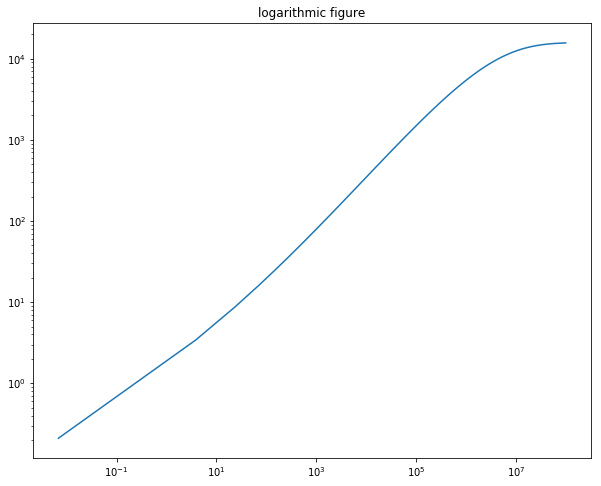

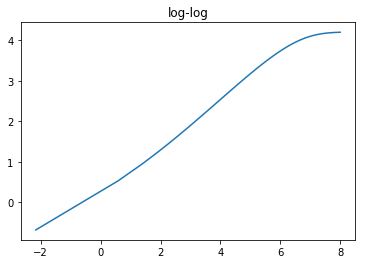

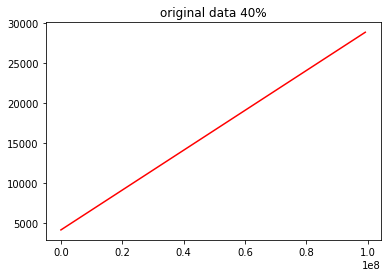

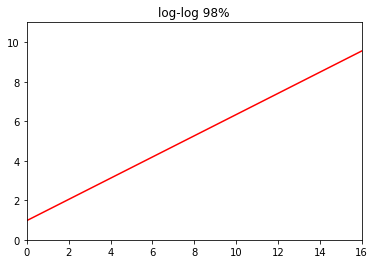

In [190]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.figure(figsize=(10,8))

# if cut off the initial point!!
plt.loglog(Time_d[1],Rad_d[1]**2 - 1)
plt.title('logarithmic figure')
plt.figure()
plt.plot(np.log10(Time_d[1]), np.log10(Rad_d[1]**2-1))
plt.title('log-log')


# if curve-fitting the original data
# score only 0.409
plt.figure()
reg = LinearRegression()
length = len(Time_d[1])
x_val = np.ones(shape=(length,2))
x_val[:,0] = Time_d[1]
y_val = Rad_d[1]**2-1
reg.fit(x_val,y_val)
print(reg.score(x_val,y_val))
plt.plot(x_val[:,0],reg.predict(x_val), c='r' )
plt.title('original data 40%')
reg.coef_

# if curve-fitting the log-log data
# the score can be 98% 
plt.figure()
reg = LinearRegression()
length = len(Time_d[1])
x_val = np.ones(shape=(length,2))
x_val[:,0] = np.log(Time_d[1])
y_val = np.log(Rad_d[1]**2-1)
reg.fit(x_val,y_val)
print(reg.score(x_val,y_val))
plt.plot(x_val[:,0],reg.predict(x_val), c='r' )
plt.xlim([0, 16])
plt.ylim([0, 11])
plt.title('log-log 98%')
reg.coef_

## (2) Curve fitting method in python

0.970793827461
0.0


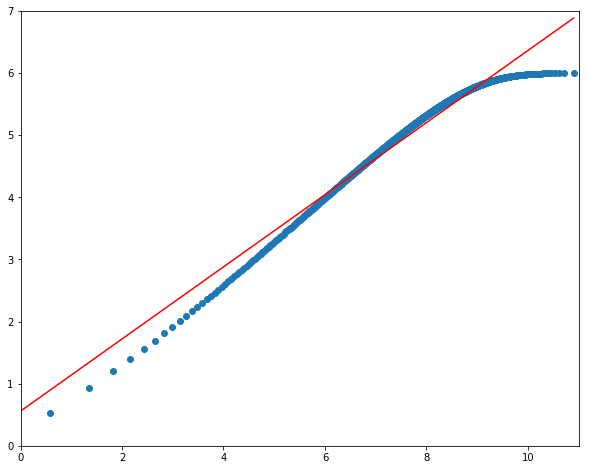

In [182]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(np.log10(Time_d[2]),np.log10(Rad_d[2]**2 - 1))

reg = LinearRegression()
length = len(Time_d[2])
x_val = np.ones(shape=(length,2))
x_val[:,0] = np.log10(Time_d[2])
y_val = np.log10(Rad_d[2]**2-1)
reg.fit(x_val,y_val)
print(reg.score(x_val,y_val))
plt.plot(x_val[:,0],reg.predict(x_val), c='r' )
plt.xlim([0,11])
plt.ylim([0,7])

# why the interception is always zeros!!!??? here has a problem
print (reg.coef_[1])

## (3) Hough Space Transformation

0.536121655939
0.0


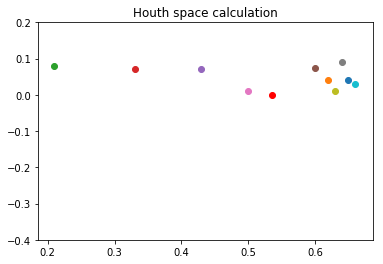

In [199]:
# becasue there is no vertical line
# can use the basic hough space transform
# no-need line transform
%matplotlib inline

plt.scatter (reg.coef_[0],reg.coef_[1],c = 'r')
plt.scatter(0.65, 0.04)
plt.scatter(0.62,0.04)
plt.scatter(0.21,0.08)
plt.scatter(0.33,0.07)
plt.scatter(0.43,0.07)
plt.scatter(0.6,0.073)
plt.scatter(0.5,0.01)
plt.scatter(0.64,0.09)
plt.scatter(0.63,0.01)
plt.scatter(0.66,0.03)
plt.title('Houth space calculation')
print(reg.coef_[0])
print(reg.coef_[1])
plt.ylim([-.4, .2])
plt.show()




## (4) Decision boundary calculation for the type curve

###  Differentiate the total loss and partial loss

In [198]:
# SVM decision making or ANN transfer